# Opgaveboek - zonneopbrengst

Bekijk het bijgeleverde bestand: "zonneopbrengst.txt".  Hierin staat de opbrengst van zonnepannelen in KWh.  Iedere dag is er een meting gedaan.
We willen hiervan een frequentieverdeling van maken (om antwoord te kunnen geven op vragen als: hoeveel dagen is er een opbrengst geweest van 1 KWh?).

- lees het bestand in
- Je maakt best eerst klassen aan (de variabele is continu).  Gebruik een klassenbreedte van 1KWh en zorg dat de linker-grens steeds bij het interval hoort

### Import van de libraries en inlezen van zonneopbrengst.txt

- lees het bestand zonneopbrengst.txt in in een dataframe
- Geef de kolom de naam 'metingen'
- Ouput de eerste 5 rijen van het dataframe

In [2]:
import pandas as pd
data = pd.read_csv('../../datasets/zonneopbrengst.txt', header=None, names=['metingen'])
data.head(5)

metingen
0      1.86
1      4.50
2      7.41
3      5.66
4      6.85

### Deel de kolom metingen op in klassen
- Bepaal het maximum van alle metingen. We willen immers dat alle metingen in een klasse terechtkomen.
- Maak nu klassen aan met een breedte van 1kWh.
- Zorg ervoor dat de linkergrens hoort er telkens bijhoort.

In [8]:
import numpy as np
data.metingen.max()
bins = np.arange(0,17,1)
klassen = pd.cut(data.metingen, bins, right=False)
klassen

15.97

0       [1, 2)
1       [4, 5)
2       [7, 8)
3       [5, 6)
4       [6, 7)
         ...  
1211    [0, 1)
1212    [1, 2)
1213    [2, 3)
1214    [0, 1)
1215    [0, 1)
Name: metingen, Length: 1216, dtype: category
Categories (16, interval[int64]): [[0, 1) < [1, 2) < [2, 3) < [3, 4) ... [12, 13) < [13, 14) < [14, 15) < [15, 16)]

### Vraag 1  

- Bepaal de frequentie per klasse en toon dit in een tabel.

In [11]:
def frequenties(data : pd.Series):
    ni = data.value_counts().sort_index()                       # absolute frequenties
    cni = ni.cumsum()                                           # cumulatieve abs. freq
    fi = data.value_counts(normalize=True).sort_index() * 100   # relatieve freq
    cfi = fi.cumsum()                                           # cum. percentages
    ps = cfi.astype(int)                                        # percentiel scores

    return pd.DataFrame(zip(ni,cni,fi,cfi,ps),
                        columns=['ni','cni','fi','cfi','ps'],
                        index=ni.index)

df = frequenties(klassen)
df

ni   cni         fi         cfi   ps
[0, 1)    254   254  20.888158   20.888158   20
[1, 2)    149   403  12.253289   33.141447   33
[2, 3)    116   519   9.539474   42.680921   42
[3, 4)     94   613   7.730263   50.411184   50
[4, 5)     83   696   6.825658   57.236842   57
[5, 6)     95   791   7.812500   65.049342   65
[6, 7)    100   891   8.223684   73.273026   73
[7, 8)    114  1005   9.375000   82.648026   82
[8, 9)     80  1085   6.578947   89.226974   89
[9, 10)    55  1140   4.523026   93.750000   93
[10, 11)   42  1182   3.453947   97.203947   97
[11, 12)   30  1212   2.467105   99.671053   99
[12, 13)    3  1215   0.246711   99.917763   99
[13, 14)    0  1215   0.000000   99.917763   99
[14, 15)    0  1215   0.000000   99.917763   99
[15, 16)    1  1216   0.082237  100.000000  100

###  Vraag 2  

Plot de frequenties in een diagram (welk soort diagram is hier op zijn plaats?)

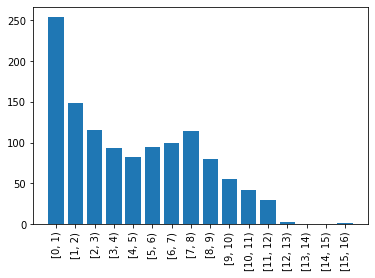

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
_ = ax.bar(x = df.index.astype(str), height=df.ni)
_ = ax.xaxis.set_tick_params(rotation=90)

In [ ]:
### Vraag 3  

Geef nu antwoord op de volgende vragen:

- op de meeste dagen van het jaar ligt de dagopbrengst in de klasse ...
- er waren ... dagen met een opbrengst tussen 3 en 4 KWh
- er waren ... dagen met een opbrengst tussen 2 en 4 KWh

Je voelt intuïtief misschien al aan dat de antwoorden op de laatste twee vragen niet echt veel informatie geven.  Dat aantal hangt nl. ook af van het aantal metingen.  We zijn meer geïnteresseerd in het percentage van de dagen waarin de opbrengst tussen 3 en 4 KWh ligt.  Dit kunnen we echter perfect berekenen a.d.h. van relatieve frequenties.  Geef antwoord op de volgende vragen:

- ...% van de dagen lag de opbrengst tussen 3 en 4 KWh
-  ...% van de dagen lag de opbrengst tussen 2 en 4 KWh

-  Stel dat ik op een bepaalde dag een opbrengst van 3 KWh meet.  Welke percentielscore komt hiermee overeen?  Is dat een grote opbrengst?
Merk hierbij op: uit de frequentietabel zou je kunnen afleiden dat een opbrengst tussen 0 en 1 zoveel voorkomt dat 3KWh enorm veel is.  Maar er zijn ook heel veel dagen met meer opbrengst, maar die zijn meer verspreid.  Een cumulatief percentage kan dit laten zien.

In [ ]:
### Vraag 3  

Geef nu antwoord op de volgende vragen:

- op de meeste dagen van het jaar ligt de dagopbrengst in de klasse ...
- er waren ... dagen met een opbrengst tussen 3 en 4 KWh
- er waren ... dagen met een opbrengst tussen 2 en 4 KWh

Je voelt intuïtief misschien al aan dat de antwoorden op de laatste twee vragen niet echt veel informatie geven.  Dat aantal hangt nl. ook af van het aantal metingen.  We zijn meer geïnteresseerd in het percentage van de dagen waarin de opbrengst tussen 3 en 4 KWh ligt.  Dit kunnen we echter perfect berekenen a.d.h. van relatieve frequenties.  Geef antwoord op de volgende vragen:

- ...% van de dagen lag de opbrengst tussen 3 en 4 KWh
-  ...% van de dagen lag de opbrengst tussen 2 en 4 KWh

-  Stel dat ik op een bepaalde dag een opbrengst van 3 KWh meet.  Welke percentielscore komt hiermee overeen?  Is dat een grote opbrengst?
Merk hierbij op: uit de frequentietabel zou je kunnen afleiden dat een opbrengst tussen 0 en 1 zoveel voorkomt dat 3KWh enorm veel is.  Maar er zijn ook heel veel dagen met meer opbrengst, maar die zijn meer verspreid.  Een cumulatief percentage kan dit laten zien.

In [ ]:
# hier komt jouw oplossing

In [ ]:
# hier komt jouw oplossing

In [ ]:
# hier komt jouw oplossing

In [ ]:
# hier komt jouw oplossing